In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Ejercicio de Clustering y Regression

Utilizando el dataset de **`FuelConsumptionCo2.csv`**:

**Parte 1**:
1. Realiza un **`Exploratory Data Analysis`** (**EDA**).
2. Realiza **preprocesamiento**.
3. Utilizando métodos de **clustering**, **¿existe alguna forma de "categorizar" los datos?**
4. Selecciona un número de **clusters "optimo"** y crea una columna con la categorización dada por el clustering.
5. Teniendo el conjunto separado en diferentes "clases" o "categorias", **realiza una regresion lineal (`LinearRegression`) para cada conjunto**.
6. Recuerda hacer **`train_test_split`** para poder calcular métricas, agrega la metrica **`r^2 ajustado`**.
7. Haz el método de validación más adecuado para los datos, **solo es necesario hacer uno para cada modelo**.
8. Guarda los modelos en un archivos binario.

**Parte 2**:
1. Investiga sobre otros modelos de regresión e implementalos con este dataset.
2. Compara las métricas de estos nuevos modelos con el anterior (**`LinearRegression`**).
3. En caso de que el modelo lo permita, haz **tunning** al modelo usando **`GridSearchCV`**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regresores
from sklearn.linear_model import LinearRegression

# Validacion
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# EDA

In [3]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
print(df["VEHICLECLASS"].values)

['COMPACT' 'COMPACT' 'COMPACT' ... 'SUV - SMALL' 'SUV - SMALL'
 'SUV - STANDARD']


In [7]:
for columna in df:
    df[[columna]].describe()

,MODELYEAR
count,1067.0
mean,2014.0
std,0.0
min,2014.0
25%,2014.0
50%,2014.0
75%,2014.0
max,2014.0


,MAKE
count,1067
unique,39
top,FORD
freq,90


,MODEL
count,1067
unique,663
top,F150 FFV
freq,8


,VEHICLECLASS
count,1067
unique,16
top,MID-SIZE
freq,178


,ENGINESIZE
count,1067.000000
mean,3.346298
std,1.415895
min,1.000000
25%,2.000000
50%,3.400000
75%,4.300000
max,8.400000


,CYLINDERS
count,1067.000000
mean,5.794752
std,1.797447
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


,TRANSMISSION
count,1067
unique,22
top,A6
freq,222


,FUELTYPE
count,1067
unique,4
top,X
freq,514


,FUELCONSUMPTION_CITY
count,1067.000000
mean,13.296532
std,4.101253
min,4.600000
25%,10.250000
50%,12.600000
75%,15.550000
max,30.200000


,FUELCONSUMPTION_HWY
count,1067.000000
mean,9.474602
std,2.794510
min,4.900000
25%,7.500000
50%,8.800000
75%,10.850000
max,20.500000


,FUELCONSUMPTION_COMB
count,1067.000000
mean,11.580881
std,3.485595
min,4.700000
25%,9.000000
50%,10.900000
75%,13.350000
max,25.800000


,FUELCONSUMPTION_COMB_MPG
count,1067.000000
mean,26.441425
std,7.468702
min,11.000000
25%,21.000000
50%,26.000000
75%,31.000000
max,60.000000


,CO2EMISSIONS
count,1067.000000
mean,256.228679
std,63.372304
min,108.000000
25%,207.000000
50%,251.000000
75%,294.000000
max,488.000000


In [8]:
InteractiveShell.ast_node_interactivity = "last_expr"

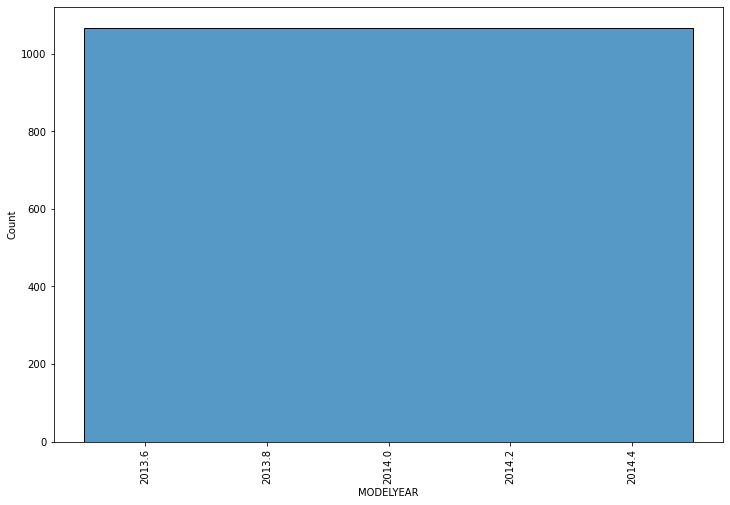

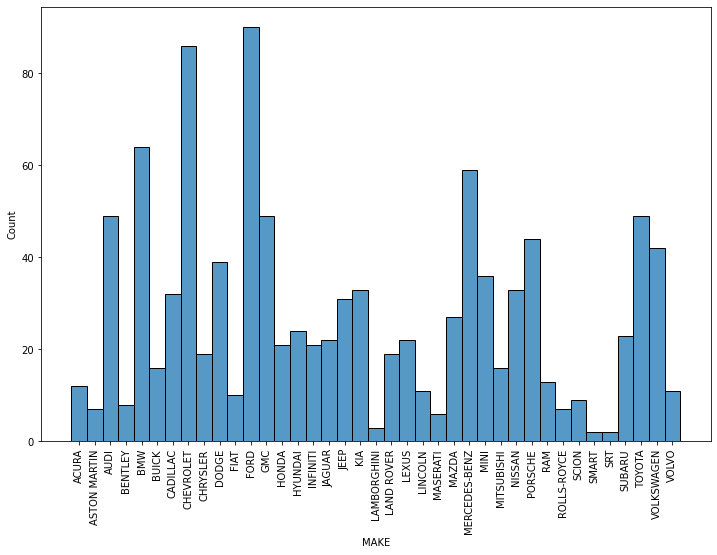

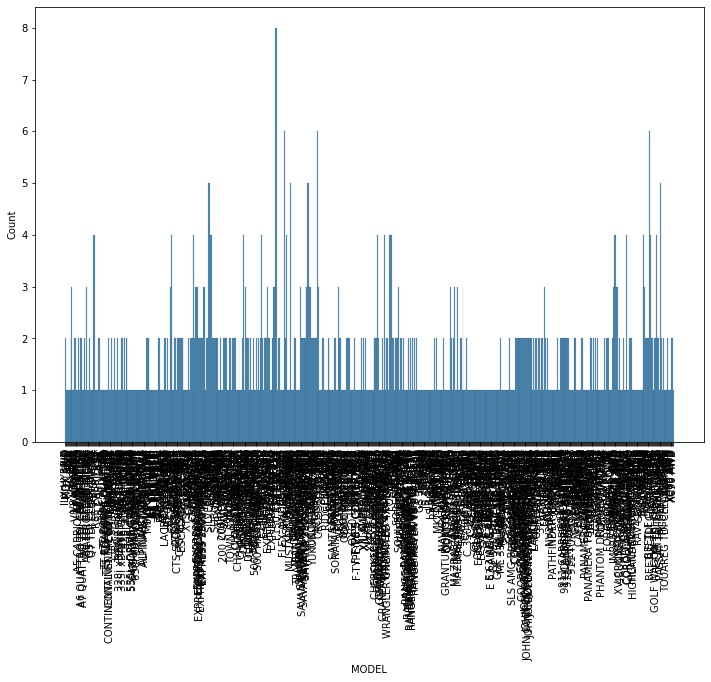

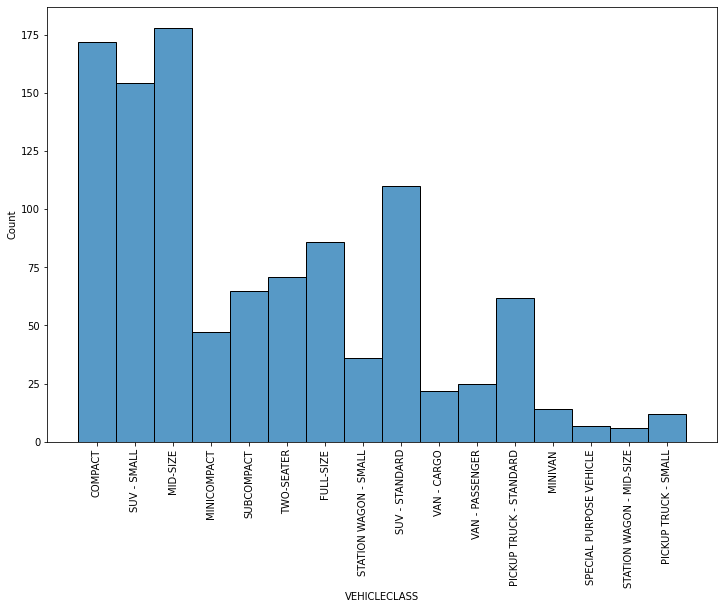

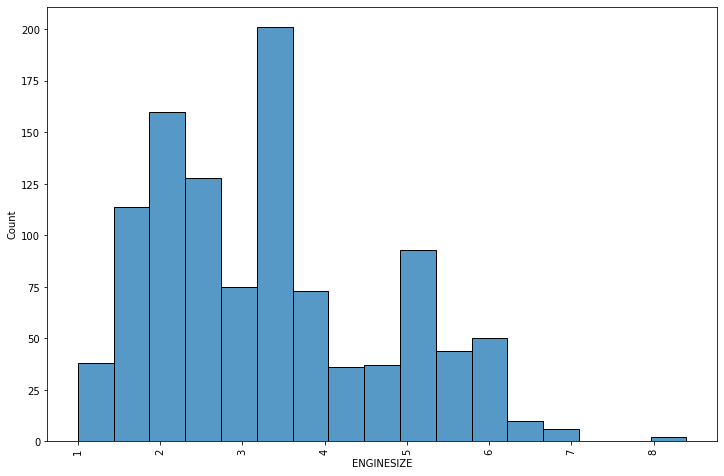

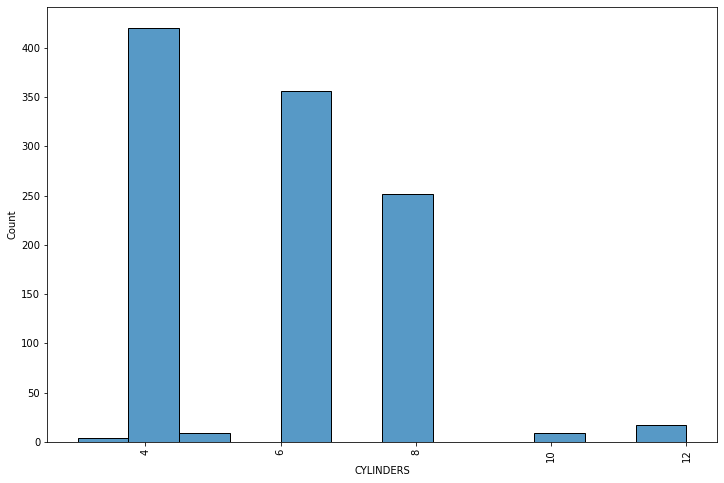

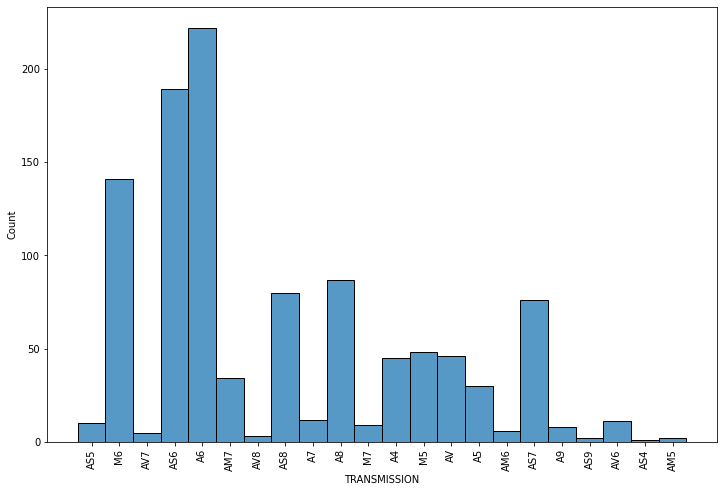

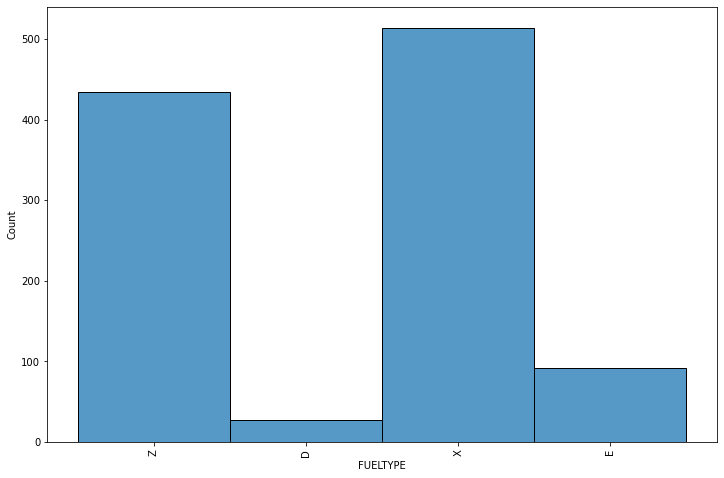

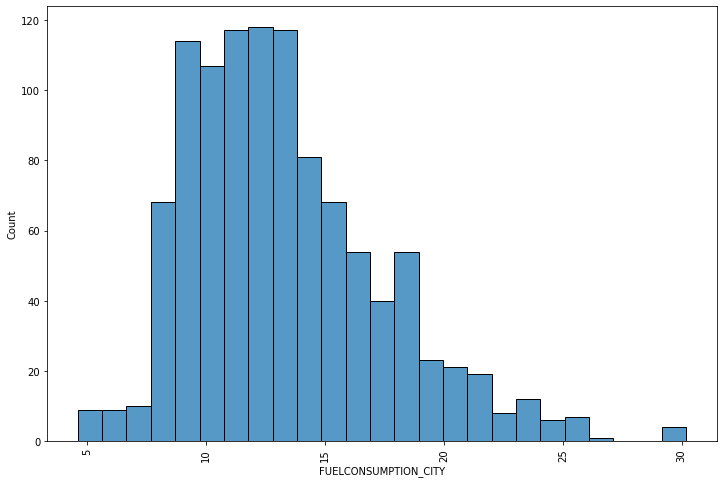

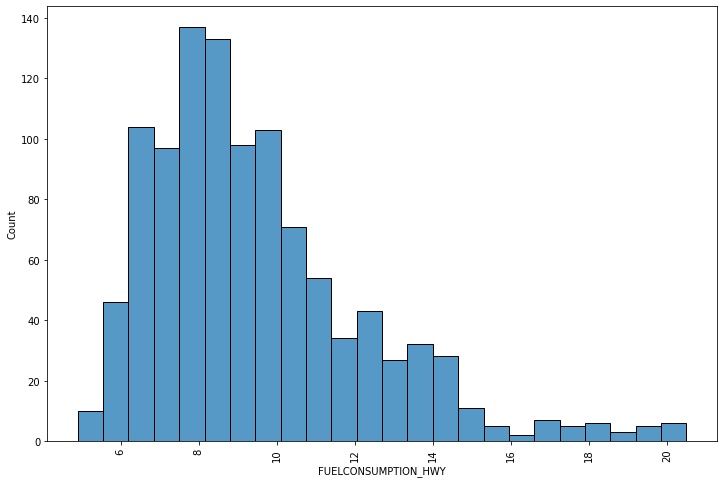

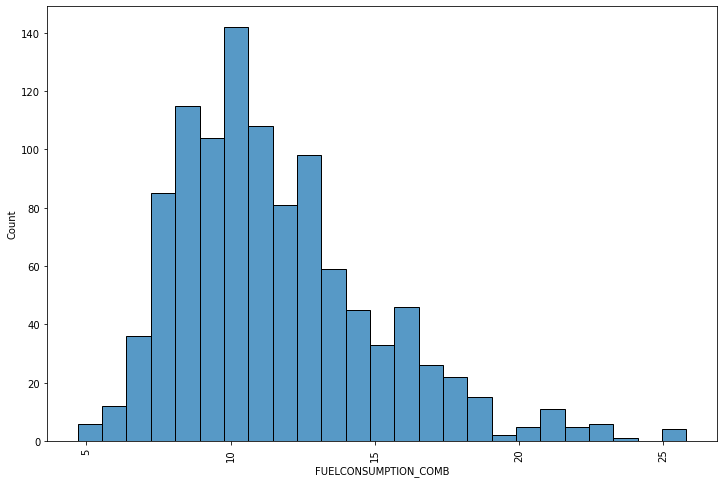

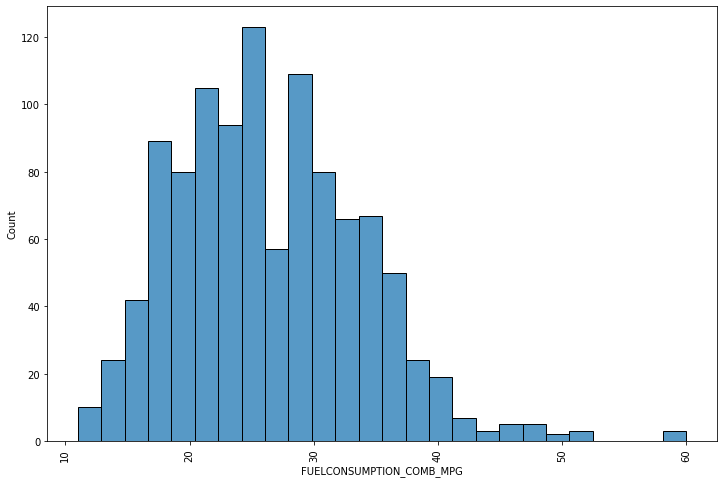

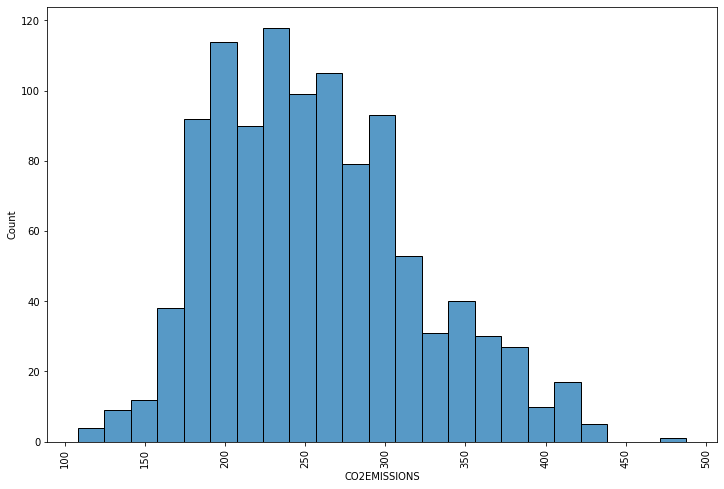

In [9]:
for columna in df:
    plt.figure(figsize=(12,8))
    sns.histplot(df[columna])
    plt.xticks(rotation = 90)
    plt.show()
    

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


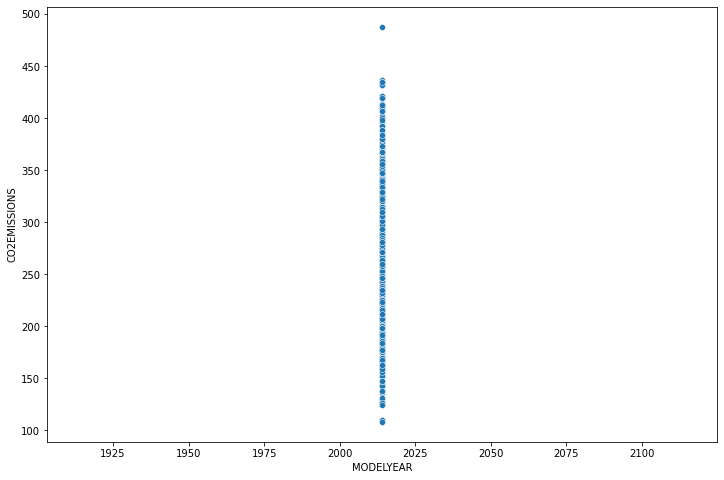

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


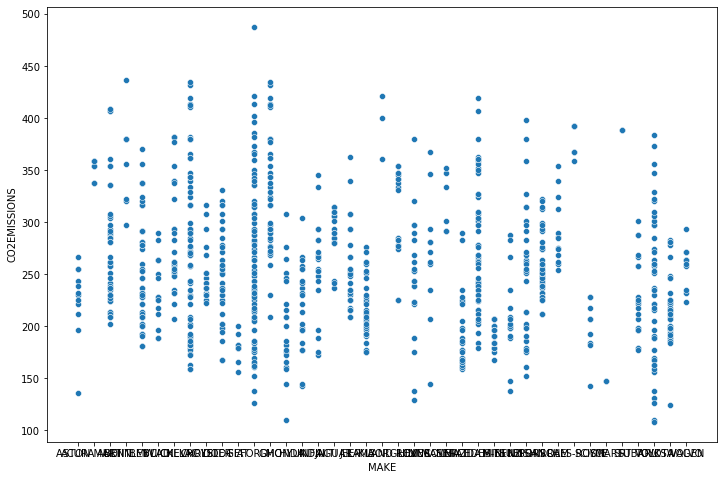

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


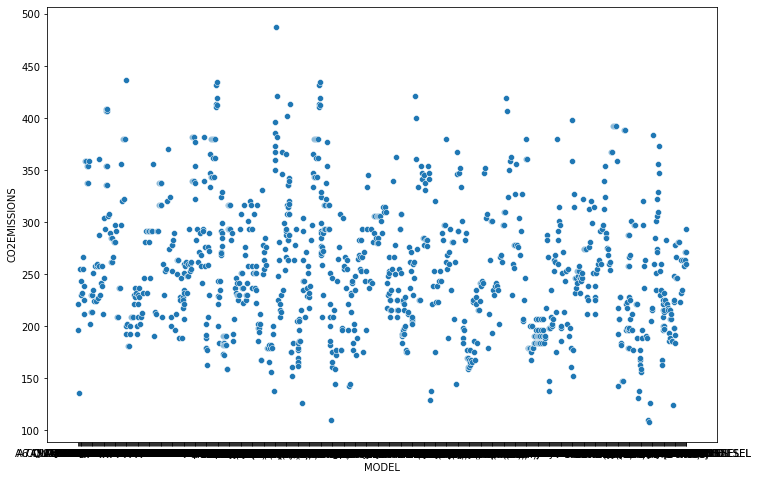

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


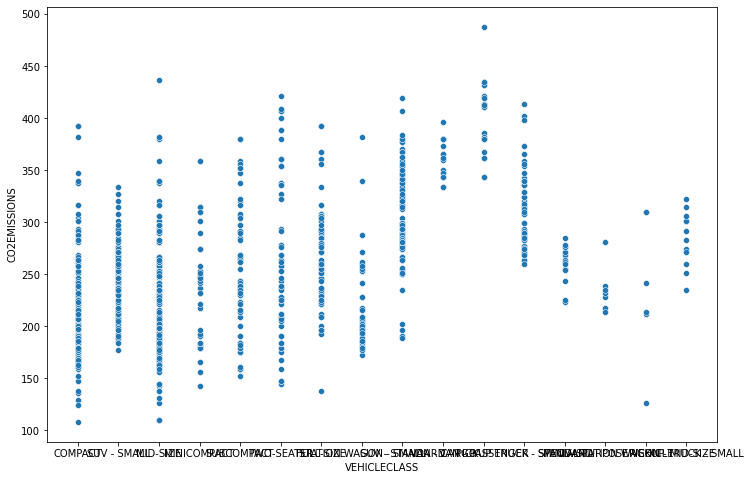

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


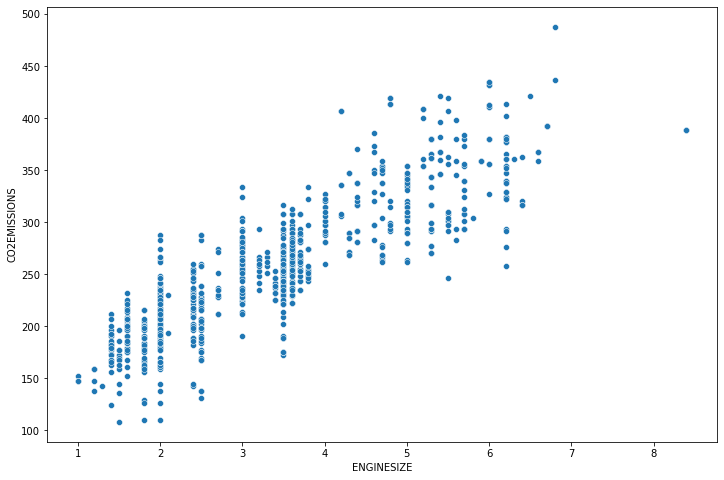

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


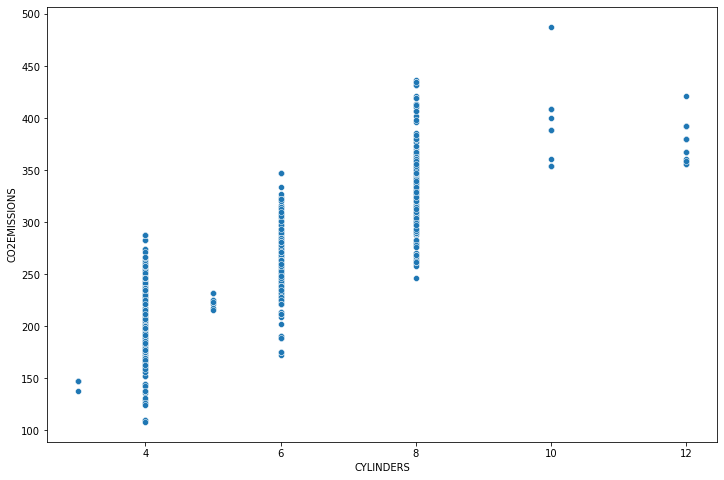

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


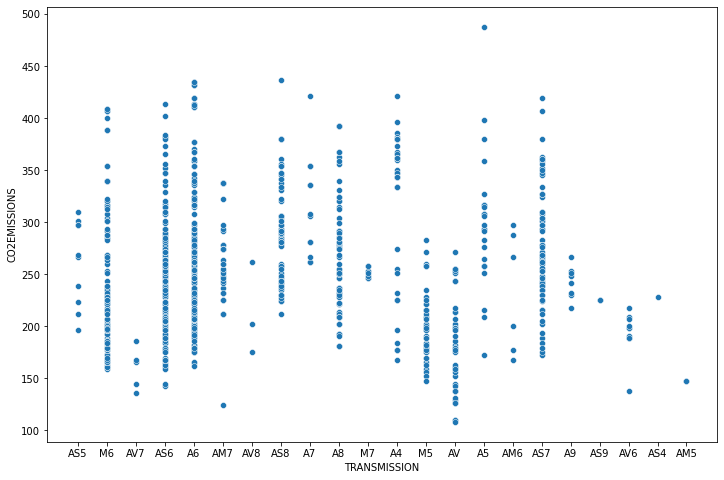

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


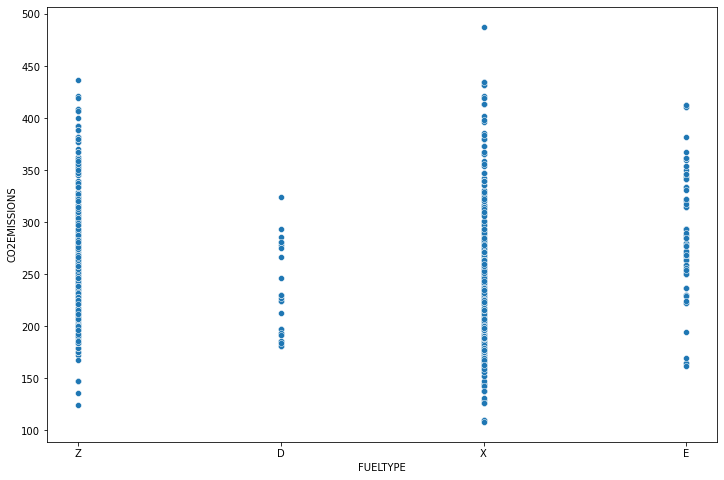

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


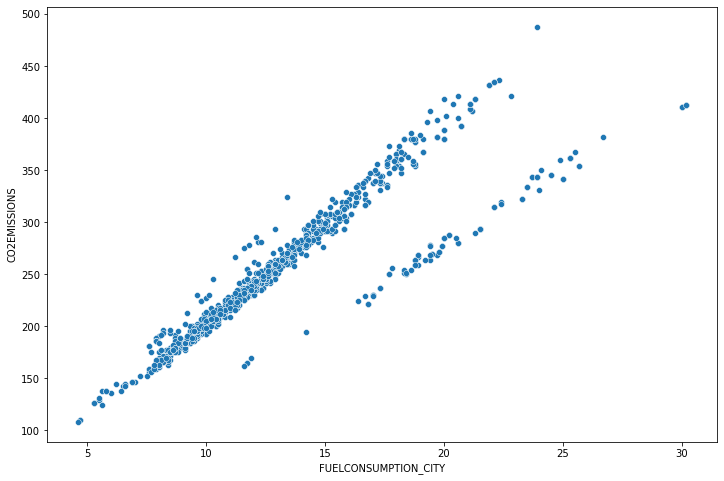

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


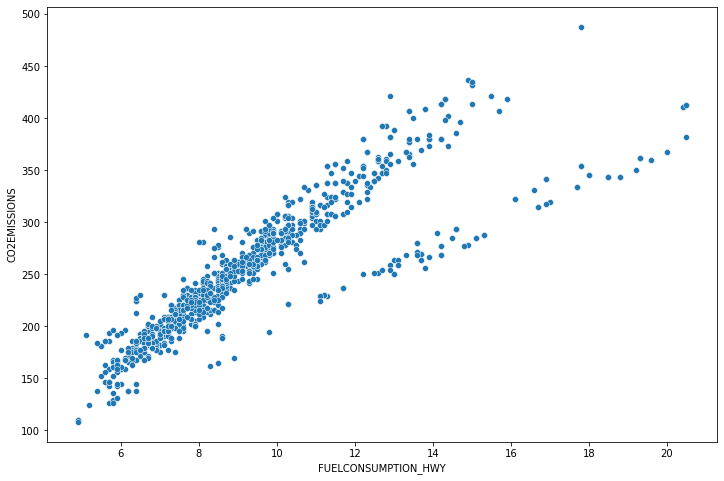

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


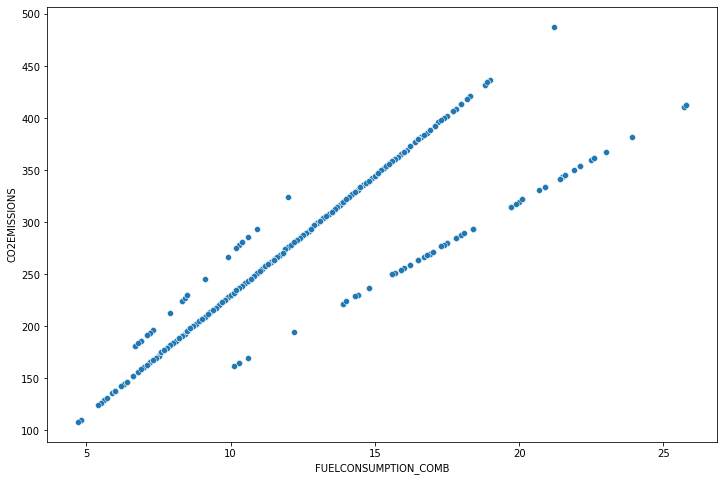

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


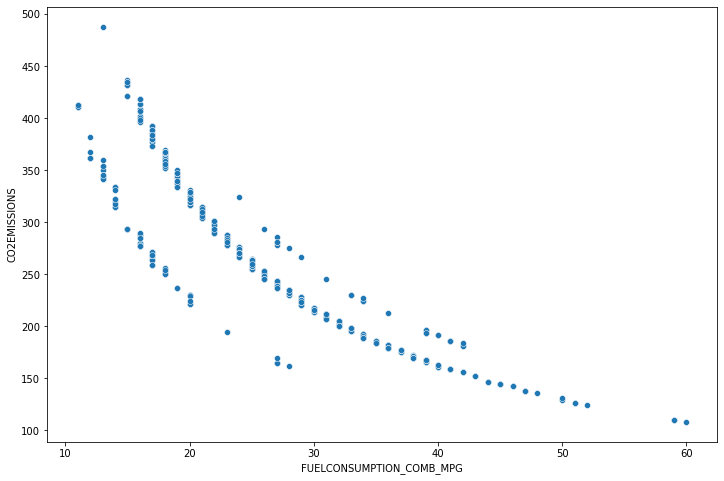

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


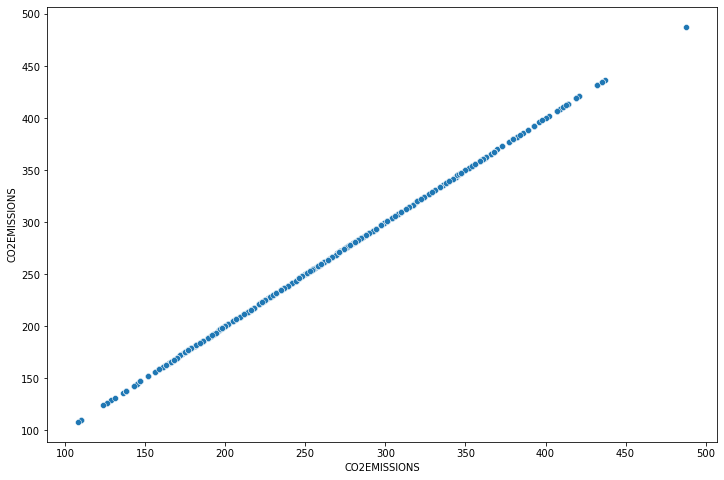

In [10]:
# Para ver la relación de las variables, con 
# la vriable objetivo (Emisiones CO2)

for variable in df:
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(df[variable], df["CO2EMISSIONS"])

    plt.show()

In [11]:
# Para averiguar si hay NaN's

df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [12]:
# La columna MODELYEAR solo tiene un valor,
# como no nos aporta nada, la eliminamos

df.drop("MODELYEAR", axis = 1, inplace = True)

In [13]:
df.head(3)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [14]:
# Quitamos la columna modelo, por haber demasiados, y no
# aportar nada

df.drop("MODEL", axis = 1, inplace = True)
df.head(3)

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [15]:
# Vamos a separar los datos, en cuantitativos y cualitativos

df_num = df._get_numeric_data().copy()

df_num.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136


In [16]:
df_cat = df.drop(df_num.columns, axis = 1)

df_cat.head(3)

,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,COMPACT,AS5,Z
1,ACURA,COMPACT,M6,Z
2,ACURA,COMPACT,AV7,Z


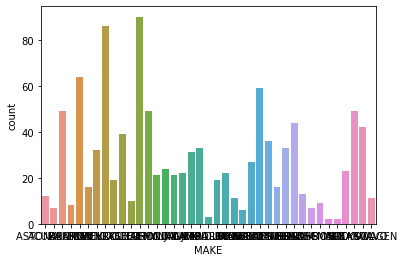

In [17]:
# Vamos a buscar desbalance, en los datos categóricos, y
# a pasar los datos a numéricos.

sns.countplot(x = df_cat["MAKE"])

plt.show()

In [18]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["MAKE"])], axis = 1)

df_cat

,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE,ACURA,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,...,PORSCHE,RAM,ROLLS-ROYCE,SCION,SMART,SRT,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,ACURA,COMPACT,AS5,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACURA,COMPACT,M6,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACURA,COMPACT,AV7,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACURA,SUV - SMALL,AS6,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACURA,SUV - SMALL,AS6,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1063,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1064,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1065,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


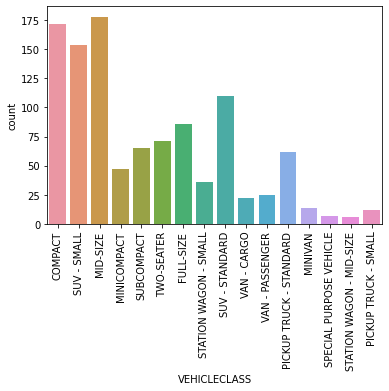

In [19]:
sns.countplot(x = df_cat["VEHICLECLASS"])
plt.xticks(rotation = 90)

plt.show()

In [20]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["VEHICLECLASS"])], axis = 1)

df_cat

,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE,ACURA,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,ACURA,COMPACT,AS5,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACURA,COMPACT,M6,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACURA,COMPACT,AV7,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACURA,SUV - SMALL,AS6,Z,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,ACURA,SUV - SMALL,AS6,Z,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1063,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1064,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1065,VOLVO,SUV - SMALL,AS6,X,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


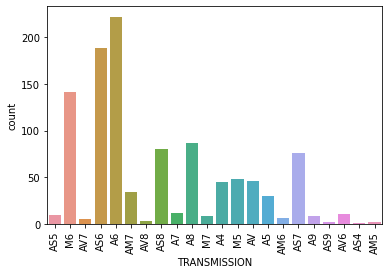

In [21]:
sns.countplot(x = df_cat["TRANSMISSION"])
plt.xticks(rotation = 90)

plt.show()

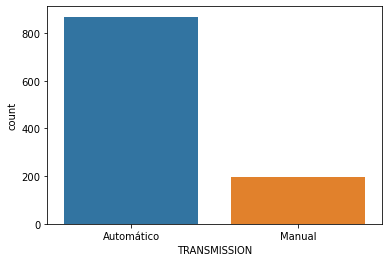

In [22]:
# Agrupamos las transmisiones, en manuales y automáticos.

df_cat["TRANSMISSION"] = df_cat["TRANSMISSION"].replace({"AS5" : "Automático", "M6" : "Manual",
                                                         "AV7" : "Automático", "AM7" : "Automático",
                                                         "AS6" : "Automático", "A6" : "Automático",
                                                         "AV8" : "Automático", "AS8" : "Automático",
                                                         "A7" : "Automático", "A8" : "Automático",
                                                         "M7" : "Manual", "M5" : "Manual", 
                                                         "A4" : "Automático", "AV" : "Automático",
                                                         "A5" : "Automático", "AM6" : "Automático",
                                                         "AS7" : "Automático", "A9" : "Automático",
                                                         "AS9" : "Automático", "AV6" : "Automático",
                                                         "AS4" : "Automático", "AM5" : "Automático"})

sns.countplot(x = df_cat["TRANSMISSION"]);

In [23]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["TRANSMISSION"])], axis = 1)

df_cat

,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE,ACURA,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,...,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual
0,ACURA,COMPACT,Automático,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,ACURA,COMPACT,Manual,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ACURA,COMPACT,Automático,Z,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ACURA,SUV - SMALL,Automático,Z,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,ACURA,SUV - SMALL,Automático,Z,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1063,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1064,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1065,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


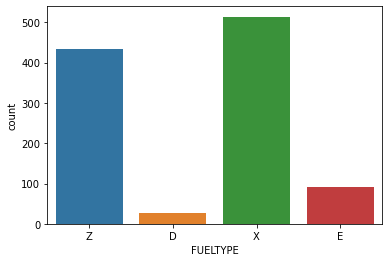

In [24]:
# En FuelType se puede pensar que existe desbalance,
# pero al no entender que significan los tipos, no sabe-
# mos como agruparlos.

sns.countplot(x = df_cat["FUELTYPE"])

plt.show()

In [25]:
df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["FUELTYPE"])], axis = 1)

df_cat

,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE,ACURA,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,...,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual,D,E,X,Z
0,ACURA,COMPACT,Automático,Z,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,ACURA,COMPACT,Manual,Z,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,ACURA,COMPACT,Automático,Z,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,ACURA,SUV - SMALL,Automático,Z,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,ACURA,SUV - SMALL,Automático,Z,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1063,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1064,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1065,VOLVO,SUV - SMALL,Automático,X,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
for col in ["MAKE", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"]:

    df_cat.drop(col, axis = 1, inplace = True)
    
df_cat

,ACURA,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,...,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual,D,E,X,Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


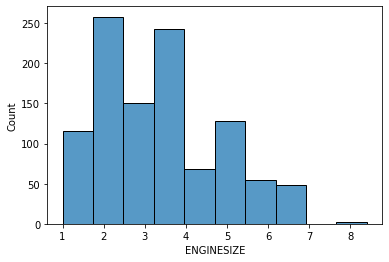

In [27]:
# Vamos a agrupar estas dos variables, y pasarlas a numéricas,
# ya que son categóricas.

sns.histplot(df_num["ENGINESIZE"], bins = 10)

plt.show()

In [28]:
df_num["ENGINESIZE"] = df_num["ENGINESIZE"].apply(lambda x: 0 if x < 4 else 1)

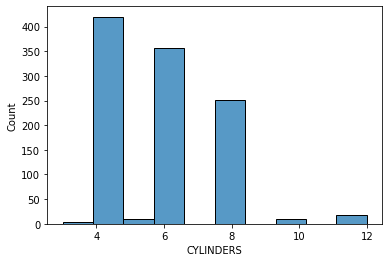

In [29]:
sns.histplot(df_num["CYLINDERS"], bins = 10)

plt.show()

In [30]:
df_num["CYLINDERS"] = df_num["CYLINDERS"].apply(lambda x: 0 if x < 8 else 1)

In [31]:
df_num["CYLINDERS"].value_counts()

0    789
1    278
Name: CYLINDERS, dtype: int64

In [32]:
df_num["ENGINESIZE"].value_counts()

0    767
1    300
Name: ENGINESIZE, dtype: int64

In [33]:
# Transformamos, con la inversa de la función, la variable "FUELCONSUMPTION_COMB_MPG",
# para tener una relación directa con las emisiones, y ayudar así al modelo.

df_num["FUELCONSUMPTION_COMB_MPG"] = df_num["FUELCONSUMPTION_COMB_MPG"].apply(lambda x: x**-1)

C:\Users\UsuarioM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


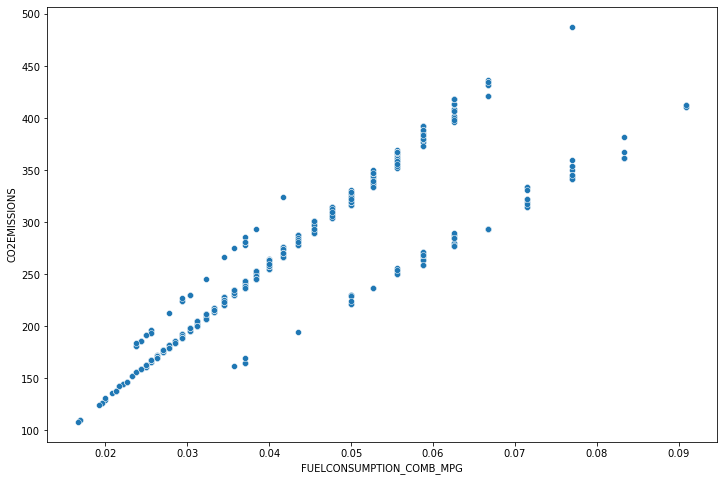

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_num["FUELCONSUMPTION_COMB_MPG"], df["CO2EMISSIONS"])
plt.show()

In [35]:
# Volvemos a unir los 2 dataframes en uno

df = pd.concat([df_num, df_cat], axis = 1)

df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,ACURA,ASTON MARTIN,AUDI,...,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual,D,E,X,Z
0,0,0,9.9,6.7,8.5,0.030303,196,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,11.2,7.7,9.6,0.034483,221,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,6.0,5.8,5.9,0.020833,136,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,12.7,9.1,11.1,0.040000,255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,12.1,8.7,10.6,0.037037,244,1,0,0,...,0,0,0,0,1,0,0,0,0,1


# Clustering

In [36]:
X = df

In [37]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.        , 0.        , 0.20703125, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.2578125 , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.0546875 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.34375   , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.32421875, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.40234375, ..., 0.        , 1.        ,
        0.        ]])

In [38]:
# Primero probamos con K-means.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [39]:
inercias = list() 
  
for k in range(1, 11): 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
    
inercias

C:\Users\UsuarioM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[3503.2635705712855,
 2949.9494406914723,
 2593.952787513437,
 2395.7665825676468,
 2247.8350217661537,
 2152.6208738729865,
 2057.4772021783774,
 1967.6670712788136,
 1931.9409840682363,
 1880.091425886803]

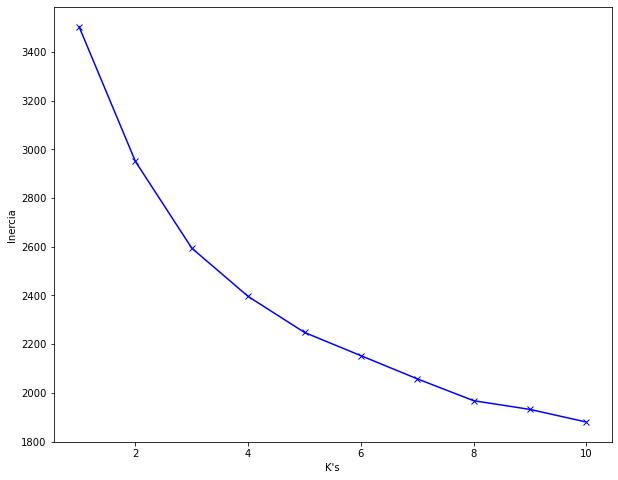

In [40]:
plt.figure(figsize = (10, 8))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

In [41]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [42]:
kmeans.labels_

array([1, 3, 1, ..., 0, 0, 0])

In [43]:
kmeans.cluster_centers_

array([[ 4.04624277e-02,  0.00000000e+00,  2.63265444e-01,
         2.15799615e-01,  2.49294579e-01,  2.50637648e-01,
         3.18641618e-01,  1.04083409e-17, -6.93889390e-18,
         2.08166817e-17, -8.67361738e-19, -6.93889390e-18,
         2.60115607e-02,  4.33526012e-02,  8.09248555e-02,
         3.17919075e-02,  5.49132948e-02,  8.67052023e-03,
         1.32947977e-01,  2.60115607e-02,  4.62427746e-02,
         5.20231214e-02,  2.89017341e-03,  2.08166817e-17,
         5.49132948e-02,  6.64739884e-02,  2.60208521e-18,
        -1.38777878e-17,  1.44508671e-02,  2.60115607e-02,
         5.20417043e-18,  4.62427746e-02, -1.11022302e-16,
         2.77555756e-17,  2.31213873e-02,  4.62427746e-02,
         4.16333634e-17,  1.15606936e-02, -6.93889390e-18,
         1.15606936e-02, -2.16840434e-19, -2.16840434e-19,
         2.89017341e-02,  1.04046243e-01,  2.89017341e-02,
         3.17919075e-02,  1.27167630e-01,  8.09248555e-02,
         2.13872832e-01,  8.67052023e-03,  2.89017341e-0

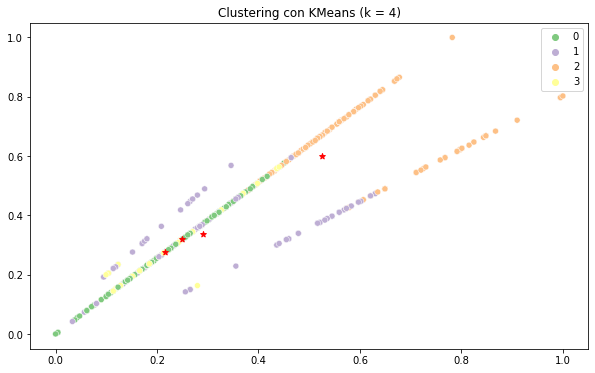

In [44]:
# Clustering con KMeans (k = 4)

plt.figure(figsize = (10, 6))

# Datos Originales con etiquetas dadas por el cluster
sns.scatterplot(x = X[:, 4], y = X[:, 6], hue = kmeans.labels_, palette = "Accent")

# Centros de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 6], color = "red", marker = "*")

plt.title("Clustering con KMeans (k = 4)")
plt.show()

In [45]:
# Con la técnica del codo del Kmeans, 4 parece ser el número
# de clases óptimo.

In [46]:
# Ahora probamos DBSCAN.

from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN()

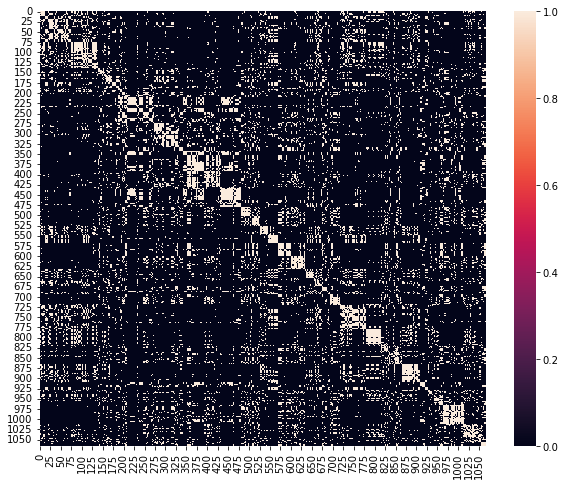

In [47]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2*X.shape[1] - 1)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Plot
plt.figure(figsize = (10, 8))

# Grafico de distancias con k-vecinos más cercanos
sns.heatmap(neigh.kneighbors_graph(X).toarray())

plt.show()

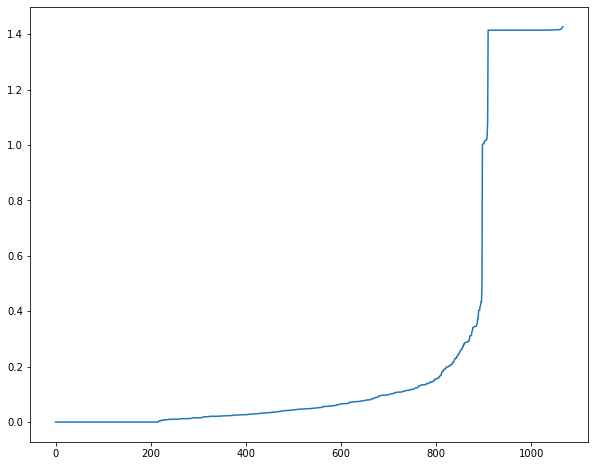

In [48]:
plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.show()

In [49]:
dbscan = DBSCAN(eps = 1.43, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=1.43)

In [50]:
from collections import Counter

Counter(dbscan.labels_)

Counter({0: 979, 1: 83, -1: 5})

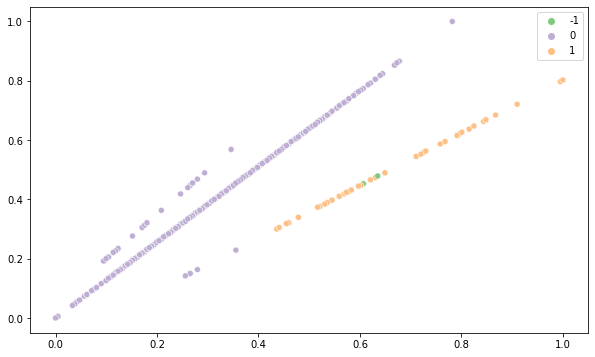

In [51]:
dbscan = DBSCAN(eps = 1.43, min_samples = 5)
dbscan.fit(X)

plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 4], y = X[:, 6], hue = dbscan.labels_, palette = "Accent")
plt.show()


In [52]:
# Con la técnica del codo del DBSCAN, parece que clasifica en 2 clases
# los datos, encontrando 5 outliers. Vamos a quedarnos con esta clasificación.

In [53]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
# Incluimos la nueva columna clases a los datos.
df["Clases"] = dbscan.labels_

In [55]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,ACURA,ASTON MARTIN,AUDI,...,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual,D,E,X,Z,Clases
0,0,0,9.9,6.7,8.5,0.030303,196,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,11.2,7.7,9.6,0.034483,221,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,6.0,5.8,5.9,0.020833,136,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,12.7,9.1,11.1,0.040000,255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,12.1,8.7,10.6,0.037037,244,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0,0,13.4,9.8,11.8,0.041667,271,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1063,0,0,13.2,9.5,11.5,0.040000,264,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1064,0,0,13.4,9.8,11.8,0.041667,271,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1065,0,0,12.9,9.3,11.3,0.040000,260,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [56]:
# Separamos en dos grupos, por cada clase, los datos.
df0 = df[df["Clases"] == 0]
df0

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,ACURA,ASTON MARTIN,AUDI,...,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual,D,E,X,Z,Clases
0,0,0,9.9,6.7,8.5,0.030303,196,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,11.2,7.7,9.6,0.034483,221,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,6.0,5.8,5.9,0.020833,136,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,12.7,9.1,11.1,0.040000,255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,12.1,8.7,10.6,0.037037,244,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0,0,13.4,9.8,11.8,0.041667,271,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1063,0,0,13.2,9.5,11.5,0.040000,264,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1064,0,0,13.4,9.8,11.8,0.041667,271,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1065,0,0,12.9,9.3,11.3,0.040000,260,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [57]:
df1 = df[df["Clases"] == 1]
df1

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,ACURA,ASTON MARTIN,AUDI,...,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,Automático,Manual,D,E,X,Z,Clases
145,0,0,18.4,12.2,15.6,0.055556,250,0,0,0,...,0,0,0,1,0,0,1,0,0,1
180,1,1,23.3,16.1,20.1,0.071429,322,0,0,0,...,0,0,0,1,0,0,1,0,0,1
182,1,1,25.7,17.8,22.1,0.076923,354,0,0,0,...,0,0,0,1,0,0,1,0,0,1
206,0,0,18.8,13.1,16.2,0.058824,259,0,0,0,...,0,0,0,1,0,0,1,0,0,1
209,0,0,19.8,13.6,17.0,0.058824,272,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,16.4,11.1,14.0,0.050000,224,0,0,0,...,0,0,0,1,0,0,1,0,0,1
763,0,0,17.8,13.8,16.0,0.055556,256,0,0,0,...,0,0,0,1,0,0,1,0,0,1
915,0,0,20.5,14.5,17.8,0.062500,285,0,0,0,...,0,0,0,1,0,0,1,0,0,1
918,0,0,19.4,13.6,16.8,0.058824,269,0,0,0,...,0,0,0,1,0,0,1,0,0,1


# Regresiones

In [58]:
# Para df0

X = np.array(df0.drop("CO2EMISSIONS", axis = 1))

y = np.array(df0["CO2EMISSIONS"])

X.shape, y.shape

((979, 68), (979,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

Conjunto de Train: ((783, 68), (196, 68))
Conjunto de Test: ((783,), (196,))


In [60]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train) 
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [-2.79238565e-01 -1.29356606e-01 -1.44757056e-01 -2.31710950e-01
  2.30913239e+01  7.87307473e+01 -6.85887322e+08 -6.85887321e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887321e+08 -6.85887322e+08 -6.85887322e+08 -6.85887321e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887321e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887321e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887320e+08 -6.85887322e+08 -6.85887321e+08 -6.85887322e+08
 -6.85887321e+08 -6.85887321e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08  1.19345536e+08  1.19345536e+08  1.19345536e+08
  1.19345536e+08  1.19345536e+08  1.19345536e+08  1.19345537e+08
  1.19345536e+08  1.19345536e+08  1.19345536e+08  1.19345536e+08
  1.19345536e+08  1.19345537e+08  1.19345536e+08  1.19345537e+08
  1.19345537e+08

In [61]:
yhat = regresion_lineal.predict(X_test)

In [62]:
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [63]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 0.5834966776322346
MSE:	 2.962376884035992
R**2:	 0.9993816221318356
RAE:	 0.01031220942023168
RSE:	 0.0006163069607645161
Adjusted R**2:	 0.9990537019106371


In [64]:
# Para df1

X1 = np.array(df1.drop("CO2EMISSIONS", axis = 1))

y1 = np.array(df1["CO2EMISSIONS"])

X1.shape, y1.shape

((83, 68), (83,))

In [65]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)

print(f"Conjunto de Train: {X1_train.shape, X1_test.shape}")
print(f"Conjunto de Test: {y1_train.shape, y1_test.shape}")

Conjunto de Train: ((66, 68), (17, 68))
Conjunto de Test: ((66,), (17,))


In [66]:
regresion_lineal1 = LinearRegression()
regresion_lineal1.fit(X1_train, y1_train) 
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [-2.79238565e-01 -1.29356606e-01 -1.44757056e-01 -2.31710950e-01
  2.30913239e+01  7.87307473e+01 -6.85887322e+08 -6.85887321e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887321e+08 -6.85887322e+08 -6.85887322e+08 -6.85887321e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887322e+08 -6.85887321e+08 -6.85887322e+08
 -6.85887322e+08 -6.85887321e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887320e+08 -6.85887322e+08 -6.85887321e+08 -6.85887322e+08
 -6.85887321e+08 -6.85887321e+08 -6.85887322e+08 -6.85887322e+08
 -6.85887322e+08  1.19345536e+08  1.19345536e+08  1.19345536e+08
  1.19345536e+08  1.19345536e+08  1.19345536e+08  1.19345537e+08
  1.19345536e+08  1.19345536e+08  1.19345536e+08  1.19345536e+08
  1.19345536e+08  1.19345537e+08  1.19345536e+08  1.19345537e+08
  1.19345537e+08

In [67]:
yhat1 = regresion_lineal1.predict(X1_test)

In [68]:
RAE1 = np.sum(np.abs(np.subtract(y1_test, yhat1))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

RSE1 = np.sum(np.square(np.subtract(y1_test, yhat1))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

r2_ajustada1 = 1 - (1 - regresion_lineal1.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)

In [69]:
print(f"MAE:\t {mean_absolute_error(yhat1, y1_test)}")
print(f"MSE:\t {mean_squared_error(yhat1, y1_test)}")
print(f"R**2:\t {r2_score(yhat1, y1_test)}")
print(f"RAE:\t {RAE1}")
print(f"RSE:\t {RSE1}")
print(f"Adjusted R**2:\t {r2_ajustada1}")

MAE:	 0.19760931969053738
MSE:	 0.07250872529947464
R**2:	 0.9999731065284082
RAE:	 0.004562157963777384
RSE:	 2.6893616140450073e-05
Adjusted R**2:	 1.0000082749588124


# Validación

In [70]:
# Vamos a probar el método Leave One Out.

from sklearn.model_selection import LeaveOneOut

In [71]:
%%time
# Para df0

loo = LeaveOneOut()
yhat = list()


for train_index, test_index in loo.split(X): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Modelo
    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X_train, y_train)
    
    # Prediccion
    yhatdf0 = regresion_lineal.predict(X_test)
    yhat.append(yhatdf0)
    

RAE = np.sum(np.abs(np.subtract(y, yhat))) / np.sum(np.abs(np.subtract(y, np.mean(y))))

RSE = np.sum(np.square(np.subtract(y, yhat))) / np.sum(np.square(np.subtract(y, np.mean(y))))

r2_ajustada = 1 - (1 - regresion_lineal.score(X, y))*(len(y) - 1)/(len(y) - X.shape[1] - 1)

print(f"MAE:\t {mean_absolute_error(yhat, y)}")
print(f"MSE:\t {mean_squared_error(yhat, y)}")
print(f"R**2:\t {r2_score(yhat, y)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 0.5215839646886026
MSE:	 1.4240453544265763
R**2:	 0.9996432850721565
RAE:	 1363.2888245320441
RSE:	 1957.7204177437952
Adjusted R**2:	 0.9996900627009756
Wall time: 7.36 s


In [72]:
%%time

#Para df1

loo = LeaveOneOut()
yhat = list()


for train_index, test_index in loo.split(X1): 
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    
    # Modelo
    regresion_lineal1 = LinearRegression()
    regresion_lineal1.fit(X1_train, y1_train)
    
    # Prediccion
    yhatdf1 = regresion_lineal1.predict(X1_test)
    yhat.append(yhatdf1)
    

RAE1 = np.sum(np.abs(np.subtract(y1, yhat))) / np.sum(np.abs(np.subtract(y1, np.mean(y1))))

RSE1 = np.sum(np.square(np.subtract(y1, yhat))) / np.sum(np.square(np.subtract(y1, np.mean(y1))))

r2_ajustada1 = 1 - (1 - regresion_lineal1.score(X1, y1))*(len(y1) - 1)/(len(y1) - X1.shape[1] - 1)

print(f"MAE:\t {mean_absolute_error(yhat, y1)}")
print(f"MSE:\t {mean_squared_error(yhat, y1)}")
print(f"R**2:\t {r2_score(yhat, y1)}")
print(f"RAE:\t {RAE1}")
print(f"RSE:\t {RSE1}")
print(f"Adjusted R**2:\t {r2_ajustada1}")

MAE:	 0.2361048105086741
MSE:	 0.08989441790704296
R**2:	 0.999963293964575
RAE:	 109.98905874312395
RSE:	 166.02238517741281
Adjusted R**2:	 0.9999066658967221
Wall time: 268 ms


In [73]:
# Para guardar los modelos.
import pickle

In [74]:
with open("regr_lineal_df0.sav", "wb") as file:
    pickle.dump(regresion_lineal, file)

In [75]:
with open("regr_lineal_df1.sav", "wb") as file:
    pickle.dump(regresion_lineal1, file)

# Parte 2

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
# Para df0
# Se vuelve a definir la X y la y, y sus conjuntos de test,
# para evitar que tengan tamaño uno tras usar el método de validación
# leave-one-out. Lo mismo para df1.

X = np.array(df0.drop("CO2EMISSIONS", axis = 1))

y = np.array(df0["CO2EMISSIONS"])

X.shape, y.shape

((979, 68), (979,))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

Conjunto de Train: ((783, 68), (196, 68))
Conjunto de Test: ((783,), (196,))


In [79]:
def Para_dfo():
    
    model = KNeighborsRegressor()
    model1 = model.fit(X_train, y_train)
    yhat1 = model1.predict(X_test)
    
    RAE = np.sum(np.abs(np.subtract(y_test, yhat1))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

    RSE = np.sum(np.square(np.subtract(y_test, yhat1))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

    r2_ajustada = 1 - (1 - model1.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
    
    print(f"MAE:\t {mean_absolute_error(yhat1, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat1, y_test)}")
    print(f"R**2:\t {r2_score(yhat1, y_test)}")
    print(f"RAE:\t {RAE}")
    print(f"RSE:\t {RSE}")
    print(f"Adjusted R**2:\t {r2_ajustada}")
    
    print ("*"*100)
    
    model = DecisionTreeRegressor()

    model2 = model.fit(X_train, y_train)
    yhat2 = model2.predict(X_test)
    
    RAE2 = np.sum(np.abs(np.subtract(y_test, yhat2))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

    RSE2 = np.sum(np.square(np.subtract(y_test, yhat2))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

    r2_ajustada2 = 1 - (1 - model2.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
    
    print(f"MAE:\t {mean_absolute_error(yhat2, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat2, y_test)}")
    print(f"R**2:\t {r2_score(yhat2, y_test)}")
    print(f"RAE:\t {RAE2}")
    print(f"RSE:\t {RSE2}")
    print(f"Adjusted R**2:\t {r2_ajustada2}")

    print ("*"*100)
    
    model = RandomForestRegressor()
    model3 = model.fit(X_train, y_train)
    yhat3 = model3.predict(X_test)
    
    RAE3 = np.sum(np.abs(np.subtract(y_test, yhat3))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

    RSE3 = np.sum(np.square(np.subtract(y_test, yhat3))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

    r2_ajustada3 = 1 - (1 - model3.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
    
    print(f"MAE:\t {mean_absolute_error(yhat3, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat3, y_test)}")
    print(f"R**2:\t {r2_score(yhat3, y_test)}")
    print(f"RAE:\t {RAE3}")
    print(f"RSE:\t {RSE3}")
    print(f"Adjusted R**2:\t {r2_ajustada3}")

    print ("*"*100)
    
    model = AdaBoostRegressor()
    model4 = model.fit(X_train, y_train)
    yhat4 = model4.predict(X_test)
    
    RAE4 = np.sum(np.abs(np.subtract(y_test, yhat4))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

    RSE4 = np.sum(np.square(np.subtract(y_test, yhat4))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

    r2_ajustada4 = 1 - (1 - model4.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

    print(f"MAE:\t {mean_absolute_error(yhat4, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat4, y_test)}")
    print(f"R**2:\t {r2_score(yhat4, y_test)}")
    print(f"RAE:\t {RAE4}")
    print(f"RSE:\t {RSE4}")
    print(f"Adjusted R**2:\t {r2_ajustada4}")
    
    print ("*"*100) 
    
    model = GradientBoostingRegressor()
    model5 = model.fit(X_train, y_train)
    yhat5 = model5.predict(X_test)
    
    RAE5 = np.sum(np.abs(np.subtract(y_test, yhat5))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

    RSE5 = np.sum(np.square(np.subtract(y_test, yhat5))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

    r2_ajustada5 = 1 - (1 - model5.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

    print(f"MAE:\t {mean_absolute_error(yhat5, y_test)}")
    print(f"MSE:\t {mean_squared_error(yhat5, y_test)}")
    print(f"R**2:\t {r2_score(yhat5, y_test)}")
    print(f"RAE:\t {RAE5}")
    print(f"RSE:\t {RSE5}")
    print(f"Adjusted R**2:\t {r2_ajustada5}")
    
    print ("*"*100)   

In [80]:
Para_dfo()

MAE:	 4.047959183673467
MSE:	 77.89571428571425
R**2:	 0.980622616573171
RAE:	 0.07620472008781556
RSE:	 0.018224682028682576
Adjusted R**2:	 0.972017220507141
****************************************************************************************************
MAE:	 1.1224489795918366
MSE:	 55.37755102040816
R**2:	 0.9865824246327597
RAE:	 0.021130625686059275
RSE:	 0.012956274528432885
Adjusted R**2:	 0.9801065076138236
****************************************************************************************************
MAE:	 1.3661224489795896
MSE:	 59.25491326530613
R**2:	 0.9856266157530122
RAE:	 0.025717892425905556
RSE:	 0.013863432190073887
Adjusted R**2:	 0.9787136277396503
****************************************************************************************************
MAE:	 7.936894711408264
MSE:	 148.7435989958553
R**2:	 0.9607841823364393
RAE:	 0.1494157456648208
RSE:	 0.034800435689675446
Adjusted R**2:	 0.946566260161522
*************************************************

In [81]:
# Según los resultados, el mejor modelo es linear regresion, y de los
# otros, el mejor es GradientBoostingRegressor.

In [82]:
# Para df1

X1 = np.array(df1.drop("CO2EMISSIONS", axis = 1))

y1 = np.array(df1["CO2EMISSIONS"])

X1.shape, y1.shape

((83, 68), (83,))

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)

print(f"Conjunto de Train: {X1_train.shape, X1_test.shape}")
print(f"Conjunto de Test: {y1_train.shape, y1_test.shape}")

Conjunto de Train: ((66, 68), (17, 68))
Conjunto de Test: ((66,), (17,))


In [84]:
def Para_df1():
    
    model = KNeighborsRegressor()
    model1 = model.fit(X1_train, y1_train)
    yhat1 = model1.predict(X1_test)
    
    RAE = np.sum(np.abs(np.subtract(y1_test, yhat1))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

    RSE = np.sum(np.square(np.subtract(y1_test, yhat1))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

    r2_ajustada = 1 - (1 - model1.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)
    
    print(f"MAE:\t {mean_absolute_error(yhat1, y1_test)}")
    print(f"MSE:\t {mean_squared_error(yhat1, y1_test)}")
    print(f"R**2:\t {r2_score(yhat1, y1_test)}")
    print(f"RAE:\t {RAE}")
    print(f"RSE:\t {RSE}")
    print(f"Adjusted R**2:\t {r2_ajustada}")
    
    print ("*"*100)
    
    model = DecisionTreeRegressor()

    model2 = model.fit(X1_train, y1_train)
    yhat2 = model2.predict(X1_test)
    
    RAE2 = np.sum(np.abs(np.subtract(y1_test, yhat2))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

    RSE2 = np.sum(np.square(np.subtract(y1_test, yhat2))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

    r2_ajustada2 = 1 - (1 - model2.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)
    
    print(f"MAE:\t {mean_absolute_error(yhat2, y1_test)}")
    print(f"MSE:\t {mean_squared_error(yhat2, y1_test)}")
    print(f"R**2:\t {r2_score(yhat2, y1_test)}")
    print(f"RAE:\t {RAE2}")
    print(f"RSE:\t {RSE2}")
    print(f"Adjusted R**2:\t {r2_ajustada2}")

    print ("*"*100)
    
    model = RandomForestRegressor()
    model3 = model.fit(X1_train, y1_train)
    yhat3 = model2.predict(X1_test)
    
    RAE3 = np.sum(np.abs(np.subtract(y1_test, yhat3))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

    RSE3 = np.sum(np.square(np.subtract(y1_test, yhat3))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

    r2_ajustada3 = 1 - (1 - model3.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)
    
    print(f"MAE:\t {mean_absolute_error(yhat3, y1_test)}")
    print(f"MSE:\t {mean_squared_error(yhat3, y1_test)}")
    print(f"R**2:\t {r2_score(yhat3, y1_test)}")
    print(f"RAE:\t {RAE3}")
    print(f"RSE:\t {RSE3}")
    print(f"Adjusted R**2:\t {r2_ajustada3}")

    print ("*"*100)
    
    model = AdaBoostRegressor()
    model4 = model.fit(X1_train, y1_train)
    yhat4 = model4.predict(X1_test)
    
    RAE4 = np.sum(np.abs(np.subtract(y1_test, yhat4))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

    RSE4 = np.sum(np.square(np.subtract(y1_test, yhat4))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

    r2_ajustada4 = 1 - (1 - model4.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)

    print(f"MAE:\t {mean_absolute_error(yhat4, y1_test)}")
    print(f"MSE:\t {mean_squared_error(yhat4, y1_test)}")
    print(f"R**2:\t {r2_score(yhat4, y1_test)}")
    print(f"RAE:\t {RAE4}")
    print(f"RSE:\t {RSE4}")
    print(f"Adjusted R**2:\t {r2_ajustada4}")
    
    print ("*"*100) 
    
    model = GradientBoostingRegressor()
    model5 = model.fit(X1_train, y1_train)
    yhat5 = model5.predict(X1_test)
    
    RAE5 = np.sum(np.abs(np.subtract(y1_test, yhat5))) / np.sum(np.abs(np.subtract(y1_test, np.mean(y1_test))))

    RSE5 = np.sum(np.square(np.subtract(y1_test, yhat5))) / np.sum(np.square(np.subtract(y1_test, np.mean(y1_test))))

    r2_ajustada5 = 1 - (1 - model5.score(X1_test, y1_test))*(len(y1_test) - 1)/(len(y1_test) - X1_test.shape[1] - 1)

    print(f"MAE:\t {mean_absolute_error(yhat5, y1_test)}")
    print(f"MSE:\t {mean_squared_error(yhat5, y1_test)}")
    print(f"R**2:\t {r2_score(yhat5, y1_test)}")
    print(f"RAE:\t {RAE5}")
    print(f"RSE:\t {RSE5}")
    print(f"Adjusted R**2:\t {r2_ajustada5}")
    
    print ("*"*100)  

In [85]:
Para_df1()

MAE:	 3.3058823529411776
MSE:	 18.270588235294106
R**2:	 0.991215329149149
RAE:	 0.07882838283828388
RSE:	 0.007955511092093599
Adjusted R**2:	 1.002447849566798
****************************************************************************************************
MAE:	 1.0588235294117647
MSE:	 5.764705882352941
R**2:	 0.997479301830154
RAE:	 0.025247524752475253
RSE:	 0.0025101097457346207
Adjusted R**2:	 1.000772341460226
****************************************************************************************************
MAE:	 1.0588235294117647
MSE:	 5.764705882352941
R**2:	 0.997479301830154
RAE:	 0.025247524752475253
RSE:	 0.0025101097457346207
Adjusted R**2:	 1.000323622105284
****************************************************************************************************
MAE:	 2.63126742538508
MSE:	 11.744965942883265
R**2:	 0.9947633144191673
RAE:	 0.06274226781652543
RSE:	 0.005114077643891759
Adjusted R**2:	 1.0015735623519666
***********************************************

# GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Vamos a probar con el mejor modelo, en este caso, linear regresion, para df0, y
# adabost para df1

In [88]:
# Para df0, no tiene sentido utilizar GirdSearchCv,
# porque linearregresion no tiene parámetros modificables.

In [89]:
# Para saber que métricas son compatibles con grid.

from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [90]:
%%time

# Para df1.

# Modelo
model = AdaBoostRegressor()

# Parametros a iterar
params = {"n_estimators" : [25, 50, 75, 100, 125, 150]}

# Metricas
scorers = {"r2"}

#GridSearchCV
grid_solver = GridSearchCV(estimator  = model     , 
                           param_grid = params    , 
                           scoring    = scorers   ,
                           cv         = 5         ,
                           refit      = "r2" ,
                           n_jobs     = -1         )

# Resultados
model_result = grid_solver.fit(X1_train, y1_train)

print(model_result.cv_results_["mean_test_r2"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)

0.9925947957132796
****************************************************************************************************
0.9939514524050738
{'n_estimators': 125}
Wall time: 10.4 s


In [91]:
# Estas dos celdas, para guardar el modelo.

model = AdaBoostRegressor(**model_result.best_params_)
model.fit(X1, y1)

AdaBoostRegressor(n_estimators=125)

In [92]:
with open("model_AdaBoostRegressordf1.sav", "wb") as file:
    pickle.dump(model, file)

In [93]:
# Para guardar el dataset preprocesado, y usarlo más 
# adelante, en futuros trabajos.

df.to_csv("Fuelpreprocesado_Grupo0.csv", index = False)